In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and display original image
img = cv2.imread('umbrella.jpg')

In [14]:
#1 Change Brightness
brightness = 100
bright_img = cv2.convertScaleAbs(img, alpha=1, beta=brightness)

cv2.imshow('Brightened Image', bright_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Change Contrast
contrast = 2
contrast_img = cv2.convertScaleAbs(img, alpha=contrast)

cv2.imshow('Contrasted Image', contrast_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

* **when i use 0.5 the contrast becomes dark and when i change to use '2' it becomes way to bright **

In [ ]:
#2: Linear Blending

img2 = cv2.imread('houses.jpg')
img2 = cv2.resize(img2, (img.shape[1], img.shape[0]))

cv2.imshow('Second Image', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
alphas = [0.2, 0.5, 0.8]
for alpha in alphas:
    blended = cv2.addWeighted(img, alpha, img2, 1 - alpha, 0)
    cv2.imshow('Linear Blend', blended)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [28]:
frames = []

import imageio

for alpha in alphas:
    blended = cv2.addWeighted(img, alpha, img2, 1 - alpha, 0)
    
    blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)
    frames.append(blended_rgb)
imageio.mimsave('blended_animation.gif', frames, fps=10)

* We used the imageio libraries to combine two images of different transparency to make a GIF animation. The individual frames were kept and put together to achieve a smooth transition that looks like linear blending.



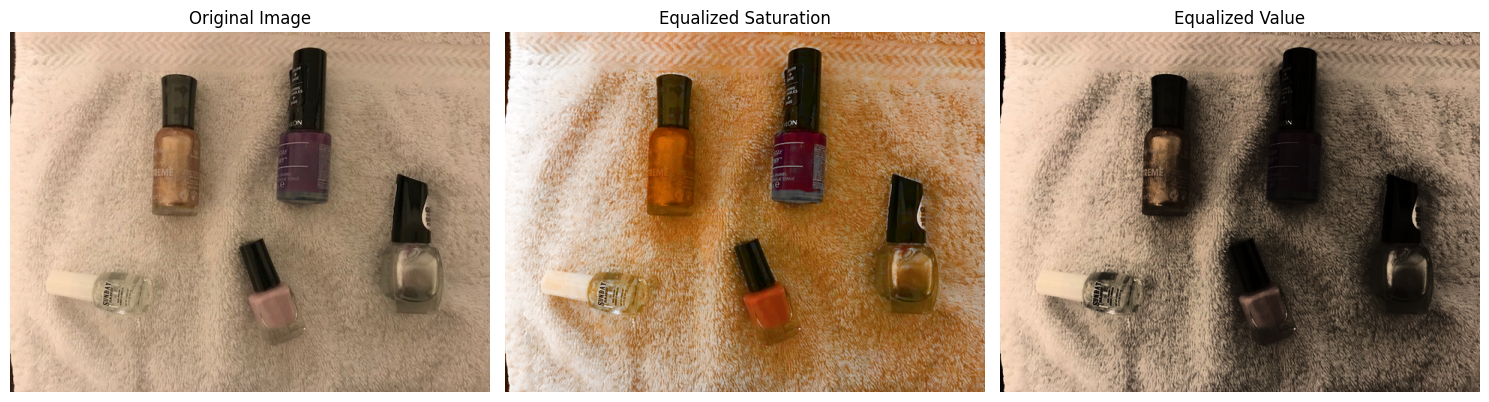

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 3: Histogram Equalization on 'nail_polish.jpg'

# Load the image and check if it loaded correctly
nail_img = cv2.imread('nail_polish.jpg')  
if nail_img is None:
    raise FileNotFoundError("Image not found. Make sure 'nail_polish.jpg' is in the correct path.")

# Convert BGR to HSV
nail_hsv = cv2.cvtColor(nail_img, cv2.COLOR_BGR2HSV)

# Equalize the Saturation channel
hsv_s = nail_hsv.copy()
hsv_s[:, :, 1] = cv2.equalizeHist(hsv_s[:, :, 1])
equalized_s = cv2.cvtColor(hsv_s, cv2.COLOR_HSV2RGB)

# Equalize the Value channel
hsv_v = nail_hsv.copy()
hsv_v[:, :, 2] = cv2.equalizeHist(hsv_v[:, :, 2])
equalized_v = cv2.cvtColor(hsv_v, cv2.COLOR_HSV2RGB)

# Show the original and both equalized results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Convert original for display
original_rgb = cv2.cvtColor(nail_img, cv2.COLOR_BGR2RGB)

axs[0].imshow(original_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(equalized_s)
axs[1].set_title("Equalized Saturation")
axs[1].axis("off")

axs[2].imshow(equalized_v)
axs[2].set_title("Equalized Value")
axs[2].axis("off")

plt.tight_layout()
plt.show()


* The RGB image is converted into HSV color space. Later, histogram equalization is used for Saturation (S) and Value (V) channels with cv2.equalizeHist() and the result is returned to display as shown